In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
sldb = pd.read_csv('synergy_logistics_database.csv')

## 1. Rutas de Importacion y Exportación
Definida como la combinacion entre el origen y el destino, asi como el medio de transporte

In [102]:
imports = sldb [sldb['direction'] == 'Imports']
exports = sldb [sldb['direction'] == 'Exports']

In [103]:
rutas_exp = exports.groupby(['origin','destination','transport_mode'])
rutas_imp = imports.groupby(['origin','destination','transport_mode'])

In [104]:
top_rutas = rutas_exp.count() ['total_value'].sort_values(ascending=False).head(10)
top_imp = rutas_imp.count() ['total_value'].sort_values(ascending=False).head(10)

<AxesSubplot:title={'center':'Rutas mas usadas de exportacion'}, ylabel='origin,destination,transport_mode'>

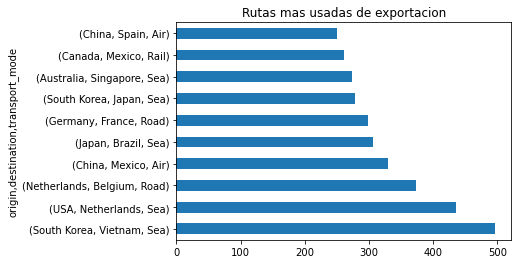

In [105]:
top_rutas.plot.barh(title= 'Rutas mas usadas de exportacion')

Podemos observar las 10 rutas mas usadas para las exportaciones (grafica azul) tomando en cuenta el origen, destino y tipo de transporte, así como para las 10 rutas mas usadas para las importaciones(grafica naranja).

<AxesSubplot:title={'center':'Rutas mas usadas de importacion'}, ylabel='origin,destination,transport_mode'>

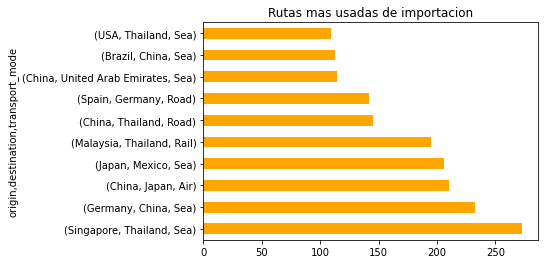

In [106]:
top_imp.plot.barh(color ='orange', title= 'Rutas mas usadas de importacion')

Por lo tanto debe de prestarle especial atencion a estas rutas para identificar los usos, así como plantearse si las rutas menos usadas siguen siendo rentables para Sinergy Logistics

## 2. Transporte más utilizado 
Se considerara el transporte mas usado e importante conforme al valor de importación y exportación


Comenzamos con los valores de exportación

In [107]:
transport_count = exports[['register_id','transport_mode']].groupby(['transport_mode']).count()
transport_mean = exports[['total_value','transport_mode']].groupby(['transport_mode']).mean()

In [108]:
transport_count_order= transport_count.sort_values(by=['register_id'], ascending=False)
transport_mean_order = transport_mean.sort_values(by=['total_value'], ascending=False)

<AxesSubplot:title={'center':'Valor total por medio de transporte'}, xlabel='transport_mode'>

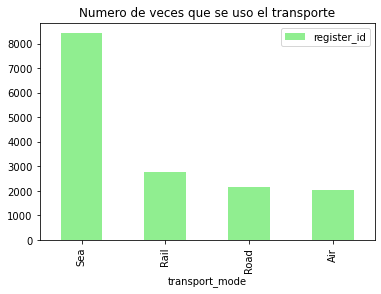

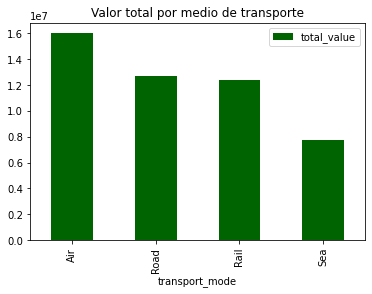

In [109]:
transport_count_order.plot.bar(title='Numero de veces que se uso el transporte', color='lightgreen')
transport_mean_order.plot.bar(title ='Valor total por medio de transporte', color ='darkgreen')


Notemos que los valores on inversamente proporcionales, lo cual nos indica que el transporte más usado fue el que menos gastos genero, y el transporte menos usado genero más gastos.

Ahora los valores de importación 

In [110]:
imp_count = imports[['register_id','transport_mode']].groupby(['transport_mode']).count()
imp_mean = imports[['total_value','transport_mode']].groupby(['transport_mode']).mean()

In [111]:
imp_count_order= imp_count.sort_values(by=['register_id'], ascending=False)
imp_mean_order = imp_mean.sort_values(by=['total_value'], ascending=False)

<AxesSubplot:title={'center':'Valor total por medio de transporte'}, xlabel='transport_mode'>

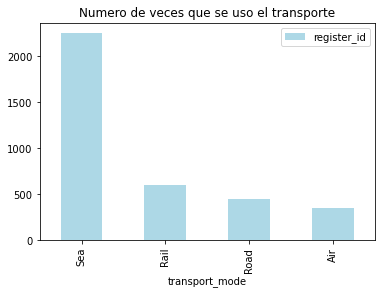

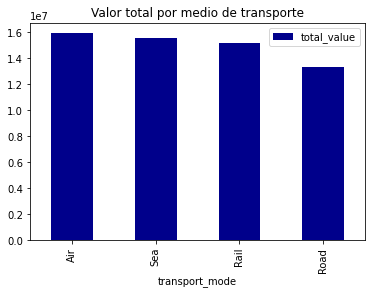

In [112]:
imp_count_order.plot.bar(title='Numero de veces que se uso el transporte', color='lightblue')
imp_mean_order.plot.bar(title ='Valor total por medio de transporte', color ='darkblue')

Notemos que en este caso, los gastos entre aire, mar y tren fueron muy similares, a pesar que se uso mucho mas el transporte por mar, tren y carretera. Implicando que nuevamente el transporte menos eficiente es el aereo por su alto costo en relacion a las veces usadas.

## 3. Valor total de Importaciones y Exportaciones
Se intenta conocer los paises donde se concentra el 80% de los ingresos 

In [113]:
part_3 = imports.groupby('origin').sum()['total_value'].sort_values(ascending=False).to_frame()



In [114]:
total=part_3['total_value'].sum()
percent = part_3['total_value'] *100 / total
value = part_3['total_value']
percet_origin= pd.DataFrame({'value':value, 'percent':percent}) 

<AxesSubplot:title={'center':'Ingreso por pais'}, ylabel='percent'>

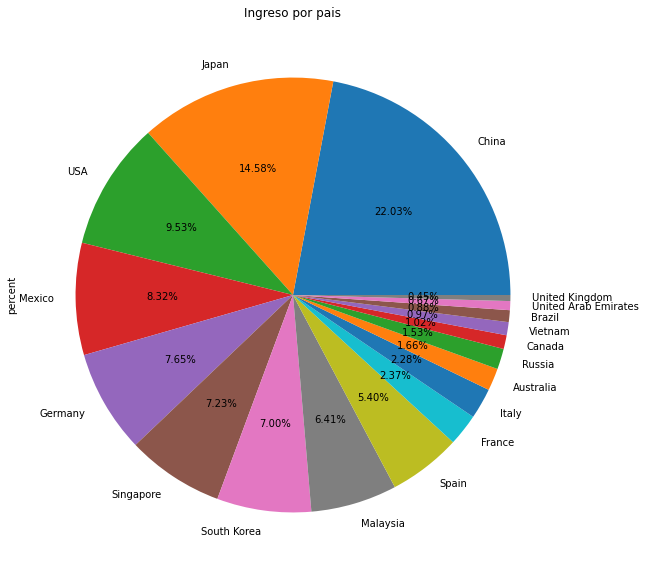

In [115]:
percet_origin.plot.pie(y='percent', figsize=(10,10),title="Ingreso por pais", legend=False,autopct='%1.2f%%')

Los paises que contribuyen al 80% de los ingresos son desde China hasta Malasía (China, Japon, Usa, Mexico, Alemania, Singapore, Korea del Sur y Malasia)